<a href="https://colab.research.google.com/github/gopalchamy/insight_generation_system/blob/main/Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving online_retail.csv to online_retail (1).csv
Original Dataset Shape: (541909, 8)

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Cleaned Dataset Shape: (392692, 9)

===== Statistical Summary =====


,Quantity,UnitPrice,TotalAmount
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,22.631500
std,180.492832,22.241836,311.099224
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000



===== Correlation Matrix =====


,Quantity,UnitPrice,TotalAmount
Quantity,1.000000,-0.004578,0.914451
UnitPrice,-0.004578,1.000000,0.081619
TotalAmount,0.914451,0.081619,1.000000



Number of Outliers: 31231


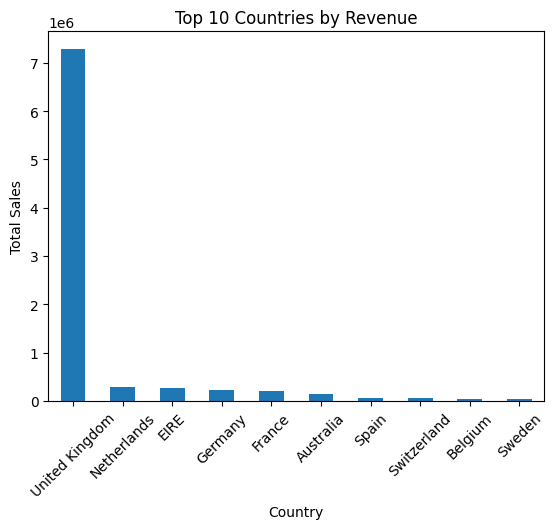

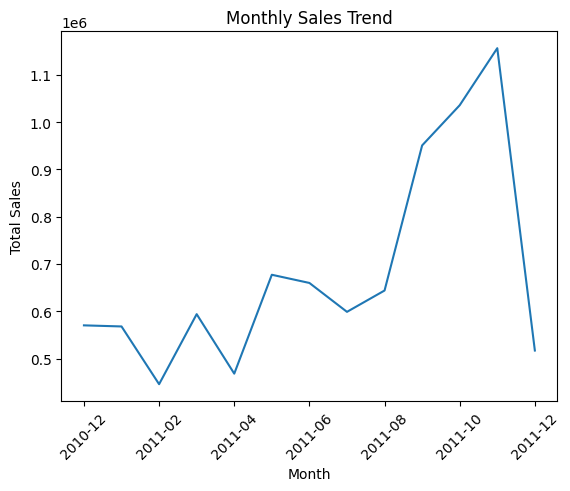

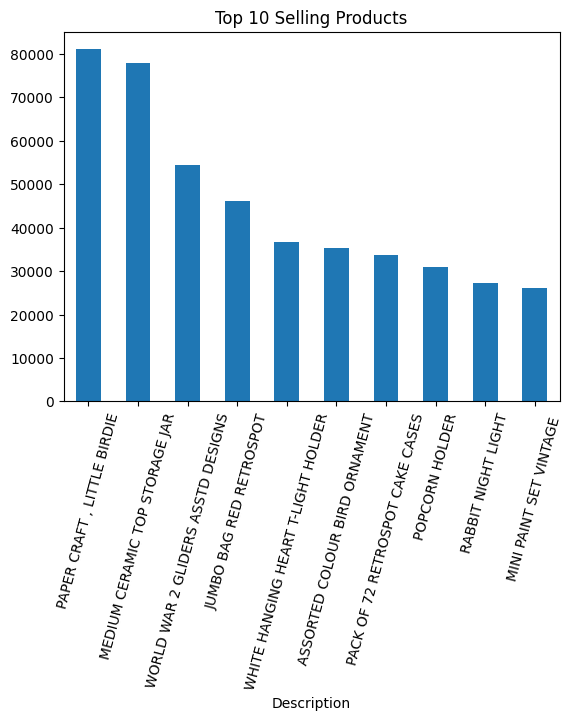

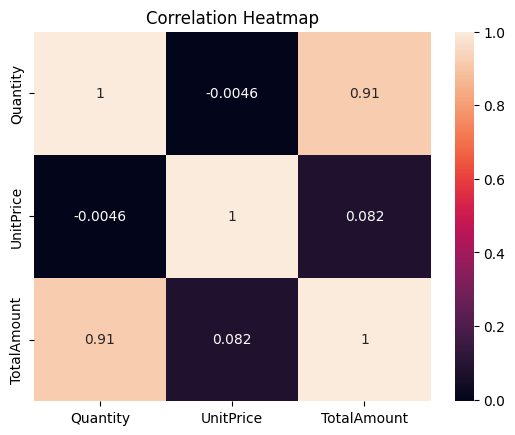


===== Top 5 Countries by Revenue (SQL) =====


,Country,Revenue
0,United Kingdom,7.285025e+06
1,Netherlands,2.854463e+05
2,EIRE,2.652625e+05
3,Germany,2.286784e+05
4,France,2.089343e+05



========== BUSINESS INSIGHTS ==========
1️⃣ Highest Revenue Country: United Kingdom
2️⃣ Total Revenue: 8887208.89
3️⃣ Average Order Value: 22.63
4️⃣ Total Unique Customers: 4338
5️⃣ Most Sold Product: PAPER CRAFT , LITTLE BIRDIE

EDA Completed Successfully 🚀


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='ISO-8859-1')

print("Original Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


df = df.drop_duplicates()


df = df.dropna(subset=['CustomerID'])

df = df[df['Quantity'] > 0]


df = df[df['UnitPrice'] > 0]


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

print("\nCleaned Dataset Shape:", df.shape)


print("\n===== Statistical Summary =====")
display(df[['Quantity','UnitPrice','TotalAmount']].describe())

print("\n===== Correlation Matrix =====")
display(df[['Quantity','UnitPrice','TotalAmount']].corr())



Q1 = df['TotalAmount'].quantile(0.25)
Q3 = df['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['TotalAmount'] < Q1 - 1.5*IQR) |
              (df['TotalAmount'] > Q3 + 1.5*IQR)]

print("\nNumber of Outliers:", len(outliers))

country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure()
country_sales.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')
monthly_sales = df.groupby('Month')['TotalAmount'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Selling Products")
plt.xticks(rotation=75)
plt.show()
plt.figure()
sns.heatmap(df[['Quantity','UnitPrice','TotalAmount']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()
df['InvoiceDate'] = df['InvoiceDate'].astype(str)
conn = sqlite3.connect(":memory:")
df.to_sql("transactions", conn, index=False, if_exists="replace")
query = """
SELECT Country, SUM(TotalAmount) AS Revenue
FROM transactions
GROUP BY Country
ORDER BY Revenue DESC
LIMIT 5
"""

sql_result = pd.read_sql(query, conn)

print("\n===== Top 5 Countries by Revenue (SQL) =====")
display(sql_result)


print("\n========== BUSINESS INSIGHTS ==========")

print("1️⃣ Highest Revenue Country:", country_sales.idxmax())
print("2️⃣ Total Revenue:", round(df['TotalAmount'].sum(), 2))
print("3️⃣ Average Order Value:", round(df['TotalAmount'].mean(), 2))
print("4️⃣ Total Unique Customers:", df['CustomerID'].nunique())
print("5️⃣ Most Sold Product:", top_products.idxmax())

print("\nEDA Completed Successfully 🚀")